In [1]:
## 시계열 데이터를 CNN 학습이 가능한 224*224 형태의 이미지 데이터로 변환

In [2]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import datetime as dt
import math

In [5]:
##절대경로 참조
import sys, os
sys.path.append(os.path.dirname(os.path.abspath(os.path.dirname('__file__'))))

from library.quant_functions import anal_funcs, data_funcs

In [3]:
import yfinance as yf
## FRED 정보 수집
from fredapi import Fred
fred = Fred(api_key='cfb4f49f5c1a9396f671b8049d992e56')

In [4]:
# 시각화 관련
import plotly_express as px
import plotly.figure_factory as ff
import cufflinks as cf
cf.go_offline(connected=True)
## cf.getThemes()
cf.set_config_file(theme='polar')
import plotly.graph_objects as go

import matplotlib
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
## plt.style.use("fivethirtyeight")
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["figure.figsize"] = (10,6)

import random

In [9]:
df = data_funcs.get_merged_df('^IXIC', '^GSPC', 'GC=F', 'TMF')

[*********************100%%**********************]  4 of 4 completed


In [66]:
df = data_funcs.get_df('^IXIC')

[*********************100%%**********************]  1 of 1 completed


In [151]:
def rec_img(s,eps=0.01, steps=10):
    N = s.size
    S = np.repeat(s[None,:],N, axis=0)
    Z = np.floor(np.abs(S-S.T)/eps)
    Z[Z>steps] = steps
    
    return Z

In [71]:
temp = df[['Close']].dropna()

In [98]:
temp['rets'] = temp['Close'].pct_change()
temp['rets5'] = temp['Close'].pct_change(5)

In [120]:
temp['label'] = 1
temp['label'][temp['rets5'] > temp['rets5'].mean() + 1*temp['rets5'].std()] = 2
temp['label'][temp['rets5'] < temp['rets5'].mean() - 1*temp['rets5'].std()] = 0
temp['label'][temp['rets5'].isna()] = np.nan
temp[['label', 'rets5']] = temp[['label', 'rets5']].shift(-6)
temp = temp.dropna()

In [136]:
## 인접 데이터 활용 방지를 위해 30%만 추출
_idx = temp.index[224:]
data_idx = random.sample(list(_idx), int(len(_idx)*.3))

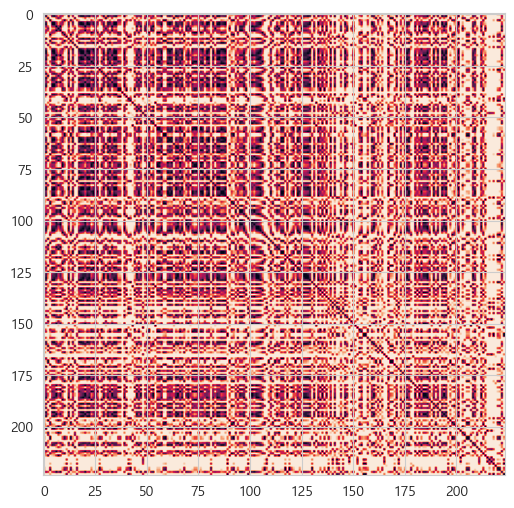

In [165]:
for i in data_idx:
    label = temp['label'][i]
    s = temp['rets'][:i].tail(224)
    img = rec_img(np.array(s),eps=0.001, steps=10)

    ## 이미지 레이블 경로에 저장

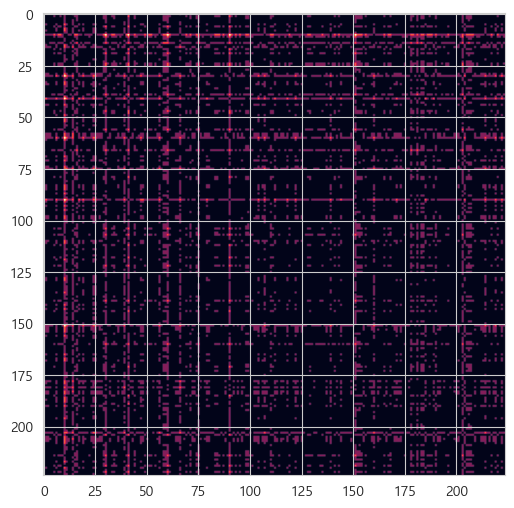

In [176]:
plt.imshow(img)
plt.show()

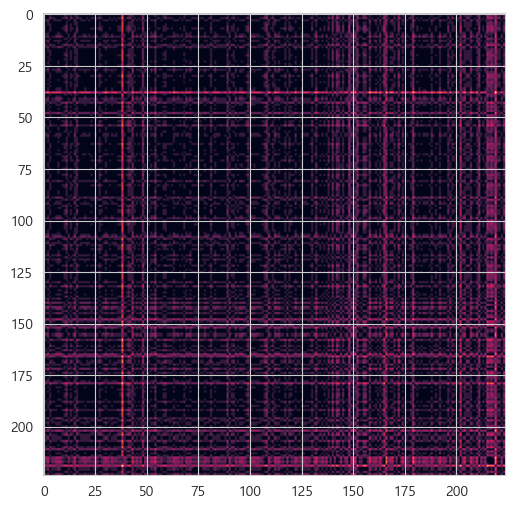